# Data Science Capstone

## Attribute Information

| Attribute | Information | TotalNumberOfClasses |
| --- | --- | --- |
| class | edible=e, poisonous=p | 2 |
| cap-shape | bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s | 6 |
| cap-surface | fibrous=f, grooves=g, scaly=y, smooth=s | 4 |
| cap-color | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y | 10 | 
| bruises | bruises=t, no=f | 2 |
| odor | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s | 9 | 
| gill-attachment | attached=a, descending=d, free=f, notched=n | 4 |
| gill-spacing | close=c, crowded=w, distant=d | 3 |
| gill-size | broad=b, narrow=n | 2 | 
| gill-color | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y | 12 | 
| stalk-shape | enlarging=e, tapering=t | 2 | 
| stalk-root | bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? | 7 | 
| stalk-surface-above-ring | fibrous=f, scaly=y, silky=k, smooth=s | 4 | 
| stalk-surface-below-ring | fibrous=f, scaly=y, silky=k, smooth=s | 4 | 
| stalk-color-above-ring | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y | 9 |
| stalk-color-below-ring | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y | 9 | 
| veil-type | partial=p, universal=u | 2 | 
| veil-color | brown=n, orange=o, white=w, yellow=y | 4 | 
| ring-number | none=n, one=o, two=t | 3 | 
| ring-type | cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z | 8 | 
| spore-print-color | black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y | 9 | 
| population | abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y | 6 | 
| habitat | grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d | 7 | 

## Exploratory Data Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Set default figure and font sizes
plt.rcParams['figure.figsize'] = (25, 25)
plt.rcParams['font.size'] = 14

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
# Read dataset into dataframe 'mushrooms'
mushrooms = pd.read_csv('data/mushrooms.csv') 

# Read dataset info into dataframe 'attributes'
attributes = pd.read_excel('data/attributes.xlsx')    

In [3]:
# Rename attribute 'class' to 'label'
mushrooms = mushrooms.rename(columns={'class': 'label'})

In [4]:
# Examine the first 5 rows 
mushrooms.head()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
# Get the number of rows and columns
mushrooms.shape

(8124, 23)

In [6]:
# Get a concise summary - see if nulls exist
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
label                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
# Display the attribute information
attributes

,Attribute,Information,TotalNumberOfClasses
0,label,"edible=e, poisonous=p",2
1,cap-shape,"bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s",6
2,cap-surface,"fibrous=f, grooves=g, scaly=y, smooth=s",4
3,cap-color,"brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y",10
4,bruises,"bruises=t, no=f",2
5,odor,"almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s",9
6,gill-attachment,"attached=a, descending=d, free=f, notched=n",4
7,gill-spacing,"close=c, crowded=w, distant=d",3
8,gill-size,"broad=b, narrow=n",2
9,gill-color,"black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y",12


In [8]:
# Find the number of unique classes present for each attribute
df_unique = mushrooms.nunique().to_frame().reset_index()
df_unique.columns = ['Attribute', 'PresentNumberOfClasses']
df_unique

,Attribute,PresentNumberOfClasses
0,label,2
1,cap-shape,6
2,cap-surface,4
3,cap-color,10
4,bruises,2
5,odor,9
6,gill-attachment,2
7,gill-spacing,2
8,gill-size,2
9,gill-color,12


In [9]:
# Display the number of unique classes absent and present for each attribute
eda_summary = pd.merge(attributes, df_unique, on='Attribute')
eda_summary = eda_summary.assign(AbsentNumberOfClasses \
                                 = attributes['TotalNumberOfClasses'] - df_unique['PresentNumberOfClasses'])
eda_summary

,Attribute,Information,TotalNumberOfClasses,PresentNumberOfClasses,AbsentNumberOfClasses
0,label,"edible=e, poisonous=p",2,2,0
1,cap-shape,"bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s",6,6,0
2,cap-surface,"fibrous=f, grooves=g, scaly=y, smooth=s",4,4,0
3,cap-color,"brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y",10,10,0
4,bruises,"bruises=t, no=f",2,2,0
5,odor,"almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s",9,9,0
6,gill-attachment,"attached=a, descending=d, free=f, notched=n",4,2,2
7,gill-spacing,"close=c, crowded=w, distant=d",3,2,1
8,gill-size,"broad=b, narrow=n",2,2,0
9,gill-color,"black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y",12,12,0


In [10]:
# Create a dictionary of the number and proportion of occurrences of each class for each attribute
from collections import defaultdict
from itertools import groupby

col = 0
dict_classes = defaultdict(lambda: defaultdict(int))

for col in range(mushrooms.shape[1]):
    row = 0
    list_class = []
    for row in range(mushrooms.shape[0]):
        list_class.append(mushrooms.iloc[:,col][row])
        row += 1
    for value, freq in groupby(sorted(list_class)):
        count = len(list(freq))
        proportion = round(count/mushrooms.shape[0] * 100, 1)
        dict_classes[mushrooms.columns[col]][value] = (count, proportion)
    col += 1
    
dict_classes

defaultdict(<function __main__.<lambda>()>,
            {'label': defaultdict(int, {'e': (4208, 51.8), 'p': (3916, 48.2)}),
             'cap-shape': defaultdict(int,
                         {'b': (452, 5.6),
                          'c': (4, 0.0),
                          'f': (3152, 38.8),
                          'k': (828, 10.2),
                          's': (32, 0.4),
                          'x': (3656, 45.0)}),
             'cap-surface': defaultdict(int,
                         {'f': (2320, 28.6),
                          'g': (4, 0.0),
                          's': (2556, 31.5),
                          'y': (3244, 39.9)}),
             'cap-color': defaultdict(int,
                         {'b': (168, 2.1),
                          'c': (44, 0.5),
                          'e': (1500, 18.5),
                          'g': (1840, 22.6),
                          'n': (2284, 28.1),
                          'p': (144, 1.8),
                          'r': (16, 0.2),


In [11]:
# Display the EDA summary
eda_summary['Occurrence'] = ''
row = 0
       
for attribute in dict_classes:
    eda_summary['Occurrence'][row] = dict_classes[attribute]
    row += 1

eda_summary

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Attribute,Information,TotalNumberOfClasses,PresentNumberOfClasses,AbsentNumberOfClasses,Occurrence
0,label,"edible=e, poisonous=p",2,2,0,"{'e': (4208, 51.8), 'p': (3916, 48.2)}"
1,cap-shape,"bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s",6,6,0,"{'b': (452, 5.6), 'c': (4, 0.0), 'f': (3152, 38.8), 'k': (828, 10.2), 's': (32, 0.4), 'x': (3656, 45.0)}"
2,cap-surface,"fibrous=f, grooves=g, scaly=y, smooth=s",4,4,0,"{'f': (2320, 28.6), 'g': (4, 0.0), 's': (2556, 31.5), 'y': (3244, 39.9)}"
3,cap-color,"brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y",10,10,0,"{'b': (168, 2.1), 'c': (44, 0.5), 'e': (1500, 18.5), 'g': (1840, 22.6), 'n': (2284, 28.1), 'p': (144, 1.8), 'r': (16, 0.2), 'u': (16, 0.2), 'w': (1040, 12.8), 'y': (1072, 13.2)}"
4,bruises,"bruises=t, no=f",2,2,0,"{'f': (4748, 58.4), 't': (3376, 41.6)}"
5,odor,"almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s",9,9,0,"{'a': (400, 4.9), 'c': (192, 2.4), 'f': (2160, 26.6), 'l': (400, 4.9), 'm': (36, 0.4), 'n': (3528, 43.4), 'p': (256, 3.2), 's': (576, 7.1), 'y': (576, 7.1)}"
6,gill-attachment,"attached=a, descending=d, free=f, notched=n",4,2,2,"{'a': (210, 2.6), 'f': (7914, 97.4)}"
7,gill-spacing,"close=c, crowded=w, distant=d",3,2,1,"{'c': (6812, 83.9), 'w': (1312, 16.1)}"
8,gill-size,"broad=b, narrow=n",2,2,0,"{'b': (5612, 69.1), 'n': (2512, 30.9)}"
9,gill-color,"black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y",12,12,0,"{'b': (1728, 21.3), 'e': (96, 1.2), 'g': (752, 9.3), 'h': (732, 9.0), 'k': (408, 5.0), 'n': (1048, 12.9), 'o': (64, 0.8), 'p': (1492, 18.4), 'r': (24, 0.3), 'u': (492, 6.1), 'w': (1202, 14.8), 'y': (86, 1.1)}"


There is class balance in the dataset. The majority class 'e' occurs 51.8% of the time, while the minority class 'p' occurs 48.2% of the time.

The following 5 features have at least one class absent from the dataset. Given these features are few enough compared to the total number of 22 features present, dropping these features from modelling is not likely to change modelling results to a meaningful degree.
<br> (6) gill-attachment
<br> (7) gill-spacing
<br> (11) stalk-root
<br> (16) veil-type
<br> (19) ring-type

## Correlation Analysis

Given categorical input and output variables, Cramer's V is used to measure correlation.

In [12]:
# Define function to calculate Cramer's V correlation coefficient between a pair of categorical variables
def cramers_v(col1, col2):
    confusion_matrix = pd.crosstab(col1,col2)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [13]:
# Find correlation coefficients
mushrooms_corr = pd.DataFrame(columns=mushrooms.columns, index=mushrooms.columns)

for col1 in range(0, 23):
    for col2 in range(0, 23):
        mushrooms_corr.iloc[col1, col2] = cramers_v(mushrooms.iloc[:, col1], mushrooms.iloc[:, col2])

mushrooms_corr

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
label,0.999753,0.24433,0.195997,0.215889,0.501188,0.970558,0.127951,0.347897,0.539677,0.679877,0.10117,0.406224,0.587666,0.574551,0.523943,0.513799,NaN,0.152222,0.214212,0.6029,0.752036,0.486775,0.439323
cap-shape,0.24433,1,0.202242,0.168221,0.254415,0.243577,0.152989,0.0778491,0.345956,0.232274,0.306119,0.359388,0.15815,0.109487,0.212427,0.167534,NaN,0.223124,0.197883,0.206749,0.249101,0.240074,0.269842
cap-surface,0.195997,0.202242,1,0.222841,0.133004,0.236416,0.209977,0.337696,0.276765,0.255023,0.0763946,0.313927,0.142861,0.168331,0.250561,0.255578,NaN,0.133014,0.0972785,0.223669,0.230539,0.260952,0.249577
cap-color,0.215889,0.168221,0.222841,1,0.215101,0.330517,0.245736,0.398593,0.469156,0.280178,0.594499,0.383974,0.254962,0.318457,0.274663,0.277404,NaN,0.147231,0.336128,0.557217,0.284714,0.304085,0.325199
bruises,0.501188,0.254415,0.133004,0.215101,0.999747,0.660201,0.136129,0.298946,0.369182,0.649324,0.0984952,0.570839,0.574898,0.566441,0.482236,0.491868,NaN,0.132587,0.0693734,0.768218,0.611623,0.299568,0.530257
odor,0.970558,0.243577,0.236416,0.330517,0.660201,1,0.259923,0.428647,0.760318,0.388712,0.575023,0.619108,0.415244,0.506395,0.44933,0.445795,NaN,0.0998947,0.74225,0.696379,0.39534,0.373698,0.368861
gill-attachment,0.127951,0.152989,0.209977,0.245736,0.136129,0.259923,0.997556,0.0695602,0.107581,0.77934,0.185382,0.220201,0.0926223,0.123213,0.977312,0.977312,NaN,0.954963,0.203183,0.249776,0.826353,0.413362,0.435707
gill-spacing,0.347897,0.0778491,0.337696,0.398593,0.298946,0.428647,0.0695602,0.999545,0.107406,0.32369,0.0797951,0.575293,0.436872,0.41445,0.399947,0.374216,NaN,0.0967691,0.245173,0.289482,0.307018,0.673533,0.541961
gill-size,0.539677,0.345956,0.276765,0.469156,0.369182,0.760318,0.107581,0.107406,0.999712,0.783249,0.214033,0.627224,0.168981,0.149698,0.364753,0.345772,NaN,0.112347,0.194363,0.570257,0.659975,0.517249,0.498616
gill-color,0.679877,0.232274,0.255023,0.280178,0.649324,0.388712,0.77934,0.32369,0.783249,1,0.611291,0.514065,0.352009,0.376254,0.419543,0.415665,NaN,0.452015,0.442824,0.517343,0.484083,0.423513,0.457212


In [14]:
# Drop NaN correlation coefficients relating to (16)veil-type
mushrooms_corr.drop(['veil-type'],axis=0, inplace=True)
mushrooms_corr.drop(['veil-type'],axis=1, inplace=True)

In [15]:
# Check data type of correlation coefficients
mushrooms_corr.dtypes

label                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [16]:
# Change data type of correlation coefficients from object to float
mushrooms_corr = mushrooms_corr.astype('float')
mushrooms_corr.dtypes

label                       float64
cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

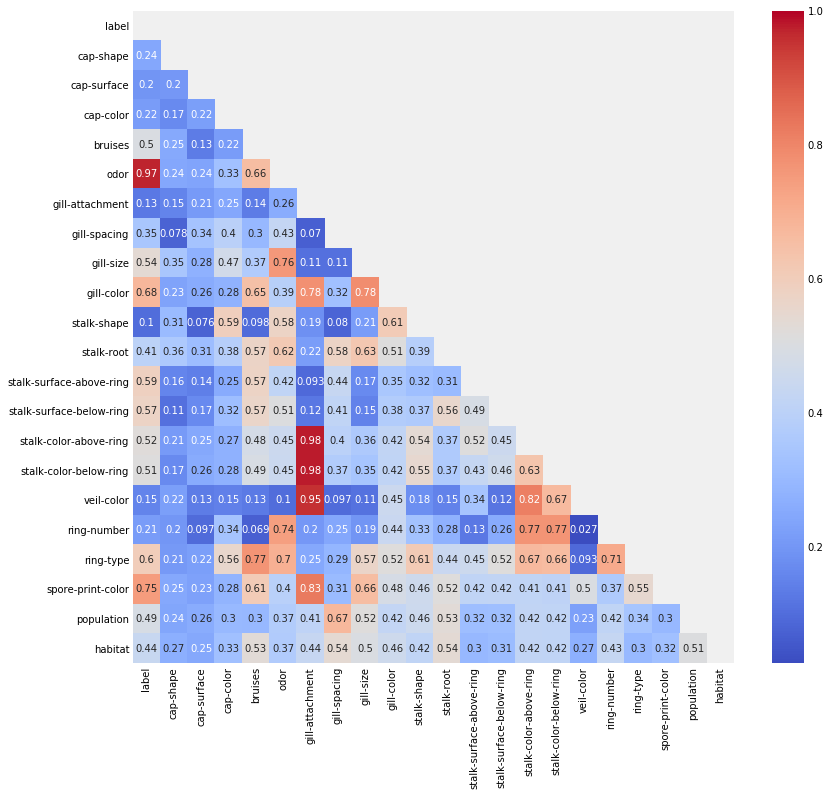

In [17]:
# Visualise correlation heatmap
fig, ax = plt.subplots(figsize=(12,12))

mask = np.zeros_like(mushrooms_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(mushrooms_corr, mask=mask, ax=ax, annot=True, fmt='.2g', cmap='coolwarm')

ax.set_xticklabels(ax.xaxis.get_ticklabels())
ax.set_yticklabels(ax.yaxis.get_ticklabels())

plt.show()

The following 4 features correlate more strongly with 'label' than the rest. These features are to be selected for modelling. 
<br> (5) odor
<br> (9) gill-color
<br> (19) ring-type
<br> (20) spore-print-color

## Modelling

In [18]:
# Import libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score

In [19]:
# Select features for modelling
features = ['odor', 'gill-color', 'ring-type', 'spore-print-color']

# Create sub dataframe with only the model features
X = mushrooms[features]

In [20]:
# Convert 'label' into indicator variable
mushrooms['label'] = mushrooms.label.map({'e':0, 'p':1})
y = mushrooms['label']

In [21]:
# Convert categorical features into indicator variables
X = pd.get_dummies(X, drop_first=True)

In [22]:
# Fit logistic regression with Lasso regularization
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=0.5, random_state=1)
logreg1 = LogisticRegression(penalty='l1', C=1.0)
logreg1.fit(X_train1, y_train1)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Get coefficients of features
features = X.columns
coefficients = logreg1.coef_[0]
pd.DataFrame([features,coefficients], index=['feature','coefficient']).transpose()

,feature,coefficient
0,odor_c,8.72516
1,odor_f,8.09832
2,odor_l,-1.21776
3,odor_m,0
4,odor_n,-5.04416
5,odor_p,9.11236
6,odor_s,1.96834
7,odor_y,1.93854
8,gill-color_e,-2.55295
9,gill-color_g,0


In [24]:
# Return predictions
y_pred1 = logreg1.predict(X_test1)

In [25]:
# Calculate baseline accuracy
1. - y_train1.mean()

0.5214180206794683

In [26]:
# Calculate test accuracy
metrics.accuracy_score(y_test1, y_pred1)

0.9933530280649926

In [27]:
# Determine confusion matrix
metrics.confusion_matrix(y_test1, y_pred1)

array([[2090,    0],
       [  27, 1945]])

In [28]:
# Determine ROC AUC
metrics.roc_auc_score(y_test1, y_pred1)

0.9931541582150101

In [29]:
# Determine classification matrix
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2090
           1       1.00      0.99      0.99      1972

   micro avg       0.99      0.99      0.99      4062
   macro avg       0.99      0.99      0.99      4062
weighted avg       0.99      0.99      0.99      4062



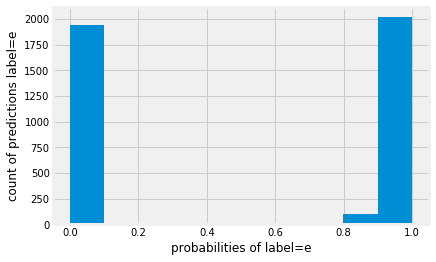

Text(0, 0.5, 'count of predictions label=p')

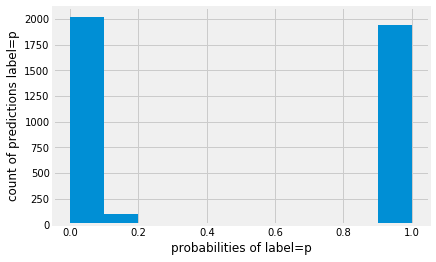

In [30]:
# Return and visualise prediction probabilities
y_pred_prob_1 = logreg1.predict_proba(X_test1)
y_pred_prob_1_t = y_pred_prob_1.transpose()

plt.hist(y_pred_prob_1_t[0])
plt.xlabel('probabilities of label=e')
plt.ylabel('count of predictions label=e')
plt.show()
plt.hist(y_pred_prob_1_t[1])
plt.xlabel('probabilities of label=p')
plt.ylabel('count of predictions label=p')

In [31]:
# Fit logistic regression with varying Lasso regularization
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.5, random_state=1)

cees = [0.2, 0.4, 0.6, 0.8, 1.0]

for c in cees:
    print('c: {}'.format(c))
    logreg2 = LogisticRegression(penalty='l1', C=c)
    logreg2.fit(X_train2, y_train2)
    y_pred2 = logreg2.predict(X_test2)
    print('baseline accuracy: {}'.format(1. - y_train2.mean()))
    print('test accuracy: {}'.format(metrics.accuracy_score(y_test2, y_pred2)))
    print('roc: {}'.format(metrics.roc_auc_score(y_test2, y_pred2)))
    print('f1 score: {}'.format(f1_score(y_test2, y_pred2)))
    print('--------------------------------------\n')

c: 0.2
baseline accuracy: 0.5214180206794683
test accuracy: 0.9931068439192516
roc: 0.9929006085192698
f1 score: 0.992849846782431
--------------------------------------

c: 0.4
baseline accuracy: 0.5214180206794683
test accuracy: 0.9931068439192516
roc: 0.9929006085192698
f1 score: 0.992849846782431
--------------------------------------

c: 0.6
baseline accuracy: 0.5214180206794683
test accuracy: 0.9931068439192516
roc: 0.9929006085192698
f1 score: 0.992849846782431
--------------------------------------

c: 0.8
baseline accuracy: 0.5214180206794683
test accuracy: 0.9933530280649926
roc: 0.9931541582150101
f1 score: 0.9931069696196069
--------------------------------------

c: 1.0
baseline accuracy: 0.5214180206794683
test accuracy: 0.9933530280649926
roc: 0.9931541582150101
f1 score: 0.9931069696196069
--------------------------------------



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'l